In [1]:
import os
import fiona
import imageio
import numpy as np 
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [38]:
italy_mobility = pd.read_csv('../data/Italy/mobility.csv')
italy_mobility.drop(['Unnamed: 0'], axis=1, inplace=True)
italy_mobility['date'] = italy_mobility['date'].apply(pd.to_datetime, format="%Y-%m-%d")
italy_mobility.set_index('date', inplace=True)
italy_mobility = italy_mobility.T
italy_mobility.index.name = 'prov_acr'
# italy_mobility['province'] = italy_mobility.index
italy_mobility.head()

date,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,...,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21
prov_acr,,,,,,,,,,,,,,,,,,,,,
CR,0.261868,0.392103,0.732007,0.255944,0.275818,0.368712,0.277213,0.276263,0.311944,0.335625,...,0.091766,0.084831,0.074057,0.045242,0.090170,0.073618,0.047904,0.070807,0.065571,0.060976
LO,0.301355,0.351264,0.233021,0.217943,0.239225,0.287699,0.313174,0.270117,0.340392,0.291997,...,0.090450,0.097407,0.087683,0.063903,0.108687,0.107809,0.102409,0.113069,0.100747,0.105912
PC,0.259885,0.321691,0.211343,0.243337,0.249625,0.261621,0.239670,0.263257,0.327940,0.208219,...,0.100856,0.085410,0.070007,0.053944,0.067552,0.060992,0.071877,0.060626,0.086513,0.084075
BG,0.386066,0.422912,0.481504,0.380477,0.385870,0.390143,0.401822,0.445856,0.608806,0.432155,...,0.129961,0.128075,0.114496,0.093128,0.108002,0.111727,0.104448,0.117586,0.119614,0.107205
BS,0.244493,0.297358,0.272724,0.215091,0.234331,0.236185,0.240552,0.351475,0.924636,0.620511,...,0.084836,0.070368,0.065237,0.050810,0.070621,0.068934,0.069368,0.071749,0.070380,0.060648


In [39]:
dates = italy_mobility.columns

In [40]:
new_dates = pd.date_range(start=dates[-1] + pd.DateOffset(1), end=pd.to_datetime('today'))
for date in new_dates:
    italy_mobility[date] = italy_mobility[dates[-1]]

dates = dates.append(new_dates)
# italy_mobility = italy_mobility.T
italy_mobility.columns = italy_mobility.columns.date
dates = dates.date

In [41]:
italy_mobility.head()

,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,...,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04
prov_acr,,,,,,,,,,,,,,,,,,,,,
CR,0.261868,0.392103,0.732007,0.255944,0.275818,0.368712,0.277213,0.276263,0.311944,0.335625,...,0.060976,0.060976,0.060976,0.060976,0.060976,0.060976,0.060976,0.060976,0.060976,0.060976
LO,0.301355,0.351264,0.233021,0.217943,0.239225,0.287699,0.313174,0.270117,0.340392,0.291997,...,0.105912,0.105912,0.105912,0.105912,0.105912,0.105912,0.105912,0.105912,0.105912,0.105912
PC,0.259885,0.321691,0.211343,0.243337,0.249625,0.261621,0.239670,0.263257,0.327940,0.208219,...,0.084075,0.084075,0.084075,0.084075,0.084075,0.084075,0.084075,0.084075,0.084075,0.084075
BG,0.386066,0.422912,0.481504,0.380477,0.385870,0.390143,0.401822,0.445856,0.608806,0.432155,...,0.107205,0.107205,0.107205,0.107205,0.107205,0.107205,0.107205,0.107205,0.107205,0.107205
BS,0.244493,0.297358,0.272724,0.215091,0.234331,0.236185,0.240552,0.351475,0.924636,0.620511,...,0.060648,0.060648,0.060648,0.060648,0.060648,0.060648,0.060648,0.060648,0.060648,0.060648


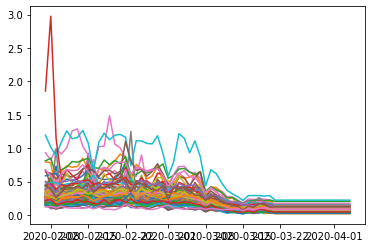

In [42]:
italy_mobility.T.plot(legend=False)

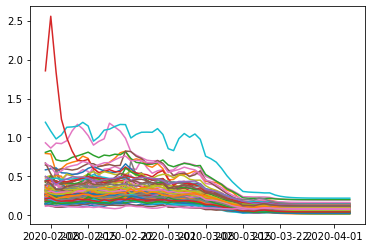

In [43]:
italy_mobility_smooth = italy_mobility.T.ewm(span=4).mean().T
italy_mobility_smooth.T.plot(legend=False)

In [57]:
gdf = gpd.read_file('../data/Italy/provinces.geojson')
gdf.index = gdf['prov_acr']
print(len(gdf))
print(len(italy_mobility))

107
87


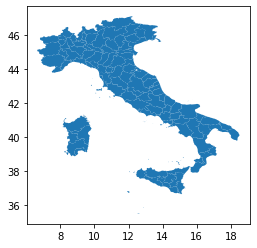

In [45]:
gdf.plot()

In [49]:
italy_mobility_geo = gdf.join(italy_mobility_smooth)
italy_mobility_geo = gdf.join(italy_mobility)

mix_min = italy_mobility_geo.loc[:, dates].min().min()
mix_max = italy_mobility_geo.loc[:, dates].max().max()

italy_mobility_geo.head()

,prov_name,prov_istat_code_num,prov_acr,reg_name,reg_istat_code,reg_istat_code_num,prov_istat_code,geometry,2020-02-07,2020-02-08,...,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04
prov_acr,,,,,,,,,,,,,,,,,,,,,
TO,Torino,1,TO,Piemonte,01,1,001,"POLYGON ((7.89397 45.58222, 7.89654 45.57985, ...",0.809281,0.849248,...,0.202793,0.202793,0.202793,0.202793,0.202793,0.202793,0.202793,0.202793,0.202793,0.202793
VC,Vercelli,2,VC,Piemonte,01,1,002,"POLYGON ((7.92900 45.74244, 7.92584 45.74196, ...",0.340810,0.263023,...,0.058961,0.058961,0.058961,0.058961,0.058961,0.058961,0.058961,0.058961,0.058961,0.058961
NO,Novara,3,NO,Piemonte,01,1,003,"POLYGON ((8.42079 45.82981, 8.42028 45.83010, ...",0.361847,0.358306,...,0.094563,0.094563,0.094563,0.094563,0.094563,0.094563,0.094563,0.094563,0.094563,0.094563
CN,Cuneo,4,CN,Piemonte,01,1,004,"MULTIPOLYGON (((6.94540 44.42794, 6.94734 44.4...",0.491723,0.522854,...,0.114694,0.114694,0.114694,0.114694,0.114694,0.114694,0.114694,0.114694,0.114694,0.114694
AT,Asti,5,AT,Piemonte,01,1,005,"POLYGON ((7.96685 45.11667, 7.96729 45.11673, ...",0.271956,0.316518,...,0.045697,0.045697,0.045697,0.045697,0.045697,0.045697,0.045697,0.045697,0.045697,0.045697


In [54]:
# make plots per day
from matplotlib import ticker, cm

output_path='../results/animations/italy_mixing_'
files = []
for i, date in enumerate(dates):
    fig = italy_mobility_geo.plot(
        column=date, 
        legend=True, 
        vmin=mix_min, vmax=mix_max, 
        missing_kwds={
            "color": "lightgrey",
#             "edgecolor": "red",
            "hatch": "",
            "label": "Missing values",
        },
    )
    fig.axis('off')
    fig.set_title(f'Mixing numbers in Italy {date}')
    file_path = os.path.join(output_path + str(date) + '.png')
    files.append(file_path)
    chart = fig.get_figure()
    chart.savefig(file_path, dpi=300)
    plt.close()

In [58]:
# Load plots and make into gif
images = []
for file in files:
    if file.endswith('.png'):
        images.append(imageio.imread(file))
        
    os.remove(file)
imageio.mimsave(output_path + 'anim.gif', images)
